In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv

from skimage import io
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import PIL
import logging    # first of all import the module

os.chdir('/home/juanp.montoya/NeuralNetworks/Final_Project/input')

In [6]:
#now we will Create and configure logger 
logging.basicConfig(filename="std.log", 
					format='%(asctime)s - %(levelname)s - %(message)s', 
					filemode='a') 

#Let us Create an object 
logger=logging.getLogger() 

#Now we are going to Set the threshold of logger to DEBUG 
logger.setLevel(logging.DEBUG) 

#some messages to test

for i in range(4):
    logger.info(f'hi {i}')
# logger.debug("This is just a harmless debug message") 
# logger.info("This is just an information for you") 
# logger.warning("OOPS!!!Its a Warning") 
# logger.error("Have you try to divide a number by zero") 
# logger.critical("The Internet is not working....") 

In [2]:
nRowsRead = 1000 
df1 = pd.read_csv('class_dict.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'class_dict.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 7 rows and 4 columns


In [4]:
nRowsRead = None 
df2 = pd.read_csv('metadata.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'metadata.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1146 rows and 4 columns


In [7]:
img_height = 2448
img_width = 2448

In [163]:
# df=pd.read_csv(r".\train.csv")
datagen=ImageDataGenerator(rescale=1./255)


In [186]:
train_generator = datagen.flow_from_dataframe(dataframe=df2.loc[df2['split'] == 'train'], 
                                            directory="", 
                                            x_col="mask_path", 
                                            y_col="mask_path", 
                                            class_mode=None,
                                            target_size=(img_height,img_width), 
                                            batch_size=32)

Found 803 validated image filenames.


In [187]:
x, y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

TypeError: 'DataFrameIterator' object is not callable

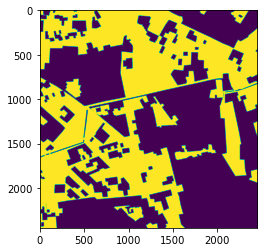

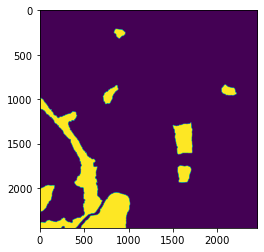

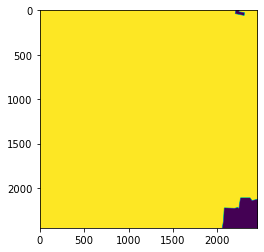

In [165]:
x = train_generator.next()
for i in range(3):
    image = x[i,:,:,0]
    plt.imshow(image)
    plt.show()

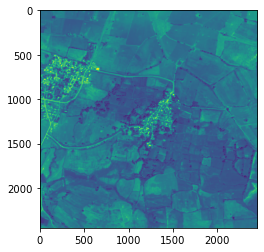

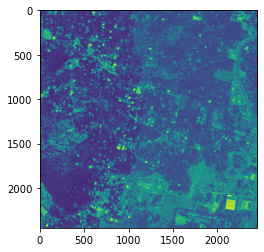

In [157]:
x = train_generator.next()
for i in range(0,2):
    image = x[i,:,:,0]
    plt.imshow(image)
    plt.show()

In [61]:
y.shape

(2448, 2448, 3)

In [83]:
s = train_generator.next()

In [112]:
x.shape

(2448, 2448, 3)

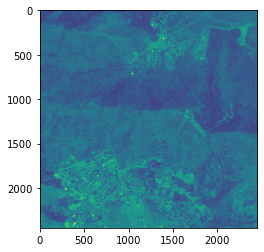

In [88]:
image = s[0,:,:,0]
plt.imshow(image)
plt.show()

In [113]:
x, h, w, c = train_generator.next()

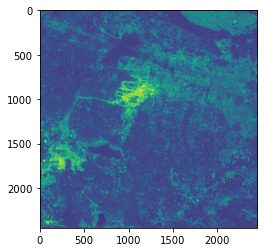

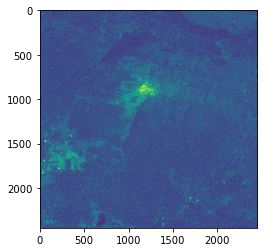

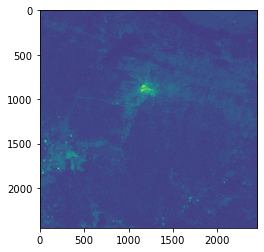

In [117]:
for i in range(0,3):
    image = x[:,:,i]
    plt.imshow(image)
    plt.show()

# Splitting

In [133]:
def split_image(image3, tile_size):
    image_shape = tf.shape(image3)
    tile_rows = tf.reshape(image3, [image_shape[0], -1, tile_size[1], image_shape[2]])
    serial_tiles = tf.transpose(tile_rows, [1, 0, 2, 3])
    return tf.reshape(serial_tiles, [-1, tile_size[1], tile_size[0], image_shape[2]])

def unsplit_image(tiles4, image_shape):
    tile_width = tf.shape(tiles4)[1]
    serialized_tiles = tf.reshape(tiles4, [-1, image_shape[0], tile_width, image_shape[2]])
    rowwise_tiles = tf.transpose(serialized_tiles, [1, 0, 2, 3])
    return tf.reshape(rowwise_tiles, [image_shape[0], image_shape[1], image_shape[2]])

In [161]:
tile_size = int(img_height/4)
tile_size

612

In [167]:
tiles = split_image(x[0,:,:,:], [tile_size, tile_size])

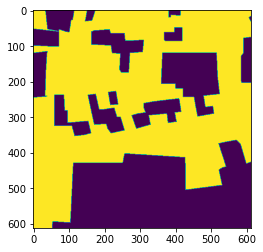

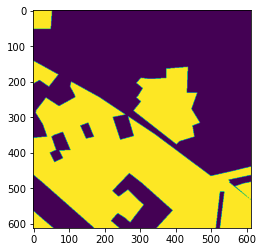

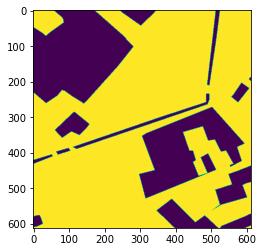

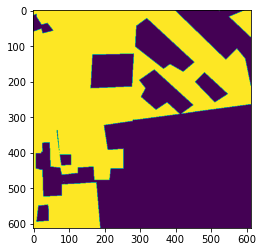

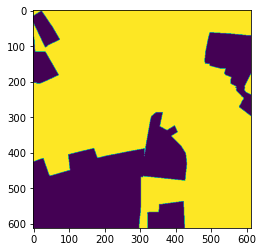

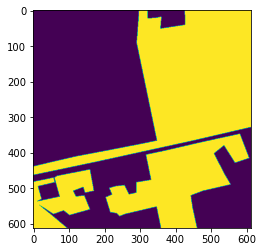

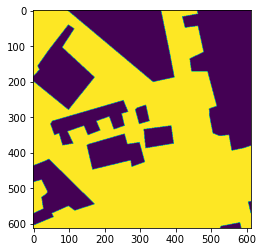

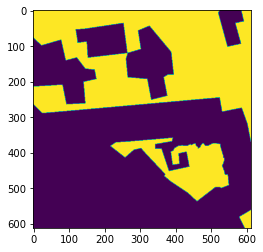

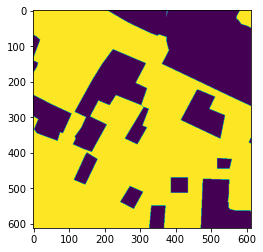

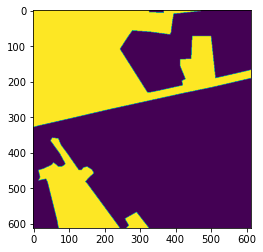

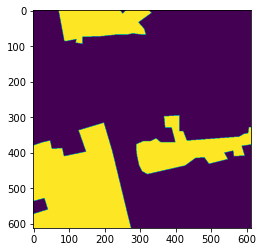

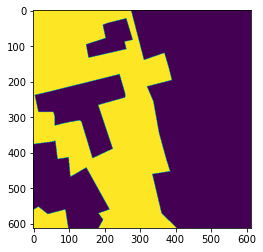

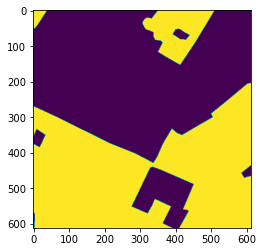

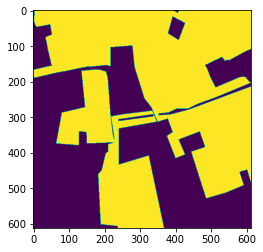

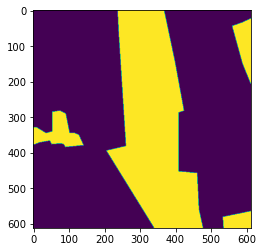

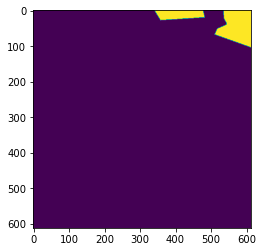

In [169]:
tiles.shape
for i in range(tiles.shape[0]):
    image = tiles[i,:,:,0]
    plt.imshow(image)
    plt.show()

In [141]:
recon = unsplit_image(tiles, tf.shape(x))


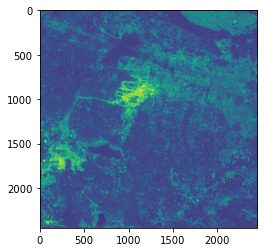

In [143]:
image = recon[:,:,0]
plt.imshow(image)
plt.show()

In [144]:
tiles.shape


TensorShape([16, 612, 612, 3])

# Save Image Tiles

In [147]:
tf.keras.preprocessing.image.save_img('../Cropping_Test/im_1.jpg', tiles[0,:,:,:], data_format=None, file_format=None, scale=True)

JPEG
(612, 612)
RGB


(612, 612, 3)

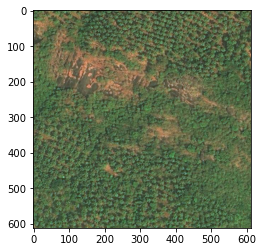

In [183]:
image = PIL.Image.open('../Cropping_Test/im_1.jpg')
print(image.format)
print(image.size)
print(image.mode)
# show the image
plt.imshow(image)
np.asarray(image).shape

In [43]:
df2

,image_id,split,sat_image_path,mask_path
0,100694,train,train/100694_sat.jpg,train/100694_mask.png
1,102122,train,train/102122_sat.jpg,train/102122_mask.png
2,10233,train,train/10233_sat.jpg,train/10233_mask.png
3,103665,train,train/103665_sat.jpg,train/103665_mask.png
4,103730,train,train/103730_sat.jpg,train/103730_mask.png
...,...,...,...,...
1141,979233,test,test/979233_sat.jpg,NaN
1142,983689,test,test/983689_sat.jpg,NaN
1143,988205,test,test/988205_sat.jpg,NaN
1144,989953,test,test/989953_sat.jpg,NaN


# Pipeline to read and transfer to numpy array

In [6]:
data_gen = ImageDataGenerator(rescale = 1. / 255)

batch_size = 2

data_generator = data_gen.flow_from_dataframe(dataframe=df2.loc[df2['split'] == 'train'], 
                                            directory="", 
                                            x_col="sat_image_path", 
                                            y_col="mask_path", 
                                            class_mode=None,
                                            seed = 0,
                                            target_size=(img_height,img_width), 
                                            batch_size=batch_size)

mask_generator = data_gen.flow_from_dataframe(dataframe=df2.loc[df2['split'] == 'train'], 
                                            directory="", 
                                            x_col="mask_path", 
                                            y_col="mask_path", 
                                            class_mode=None,
                                            seed = 0,
                                            target_size=(img_height,img_width), 
                                            batch_size=batch_size)

# data_generator = datagen.flow_from_directory(
#     data_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical')


NameError: name 'img_height' is not defined

In [54]:
data_generator[0].shape

ValueError: Asked to retrieve element 161, but the Sequence has length 161

In [29]:
data_list = []
batch_index = 0

while batch_index <= data_generator.batch_index:
    data = data_generator.next()
    data_list.append(data[0])
    batch_index = batch_index + 1
    print(batch_index, data_generator.batch_index)

# now, data_array is the numeric data of whole images
data_array = np.asarray(data_list)

1 1
2 2


KeyboardInterrupt: 

In [82]:
tile_size = int(img_height/np.sqrt(4))
print(tile_size)

1224


612


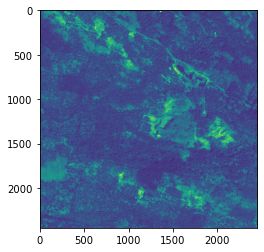

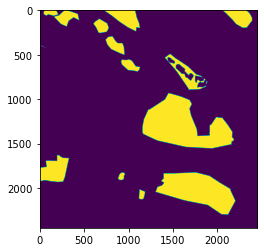

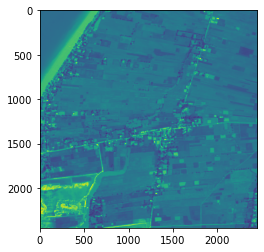

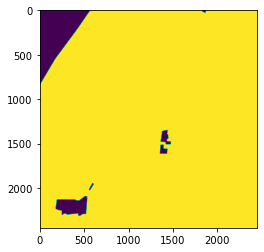

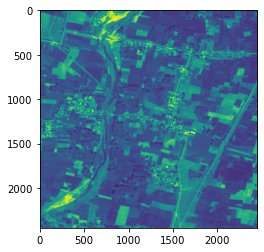

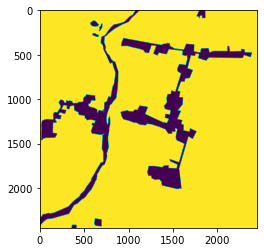

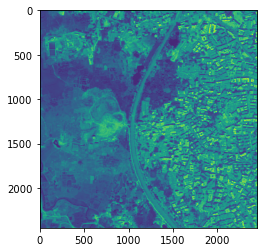

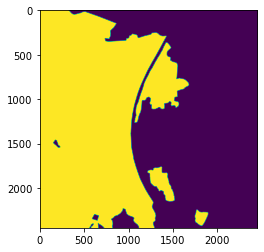

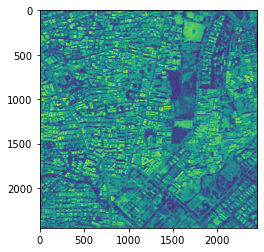

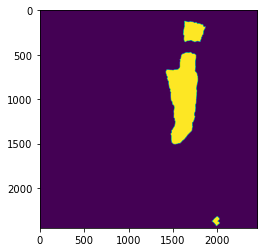

In [66]:
tile_size = int(img_height/np.sqrt(split))
print(tile_size)

batch = 0
x = data_generator[batch]
m = mask_generator[batch]
for i in range(x.shape[0]):
    image = x[i,:,:,0]
    mask = m[i,:,:,0]
    plt.imshow(image)
    plt.figure()
    plt.imshow(mask)
    plt.show()

In [5]:
def split_image(image3, tile_size):
    image_shape = tf.shape(image3)
    tile_rows = tf.reshape(image3, [image_shape[0], -1, tile_size[1], image_shape[2]])
    serial_tiles = tf.transpose(tile_rows, [1, 0, 2, 3])
    return tf.reshape(serial_tiles, [-1, tile_size[1], tile_size[0], image_shape[2]])

def unsplit_image(tiles4, image_shape):
    tile_width = tf.shape(tiles4)[1]
    serialized_tiles = tf.reshape(tiles4, [-1, image_shape[0], tile_width, image_shape[2]])
    rowwise_tiles = tf.transpose(serialized_tiles, [1, 0, 2, 3])
    return tf.reshape(rowwise_tiles, [image_shape[0], image_shape[1], image_shape[2]])

In [73]:
tiles = split_image(x[3,:,:,:], [tile_size, tile_size])

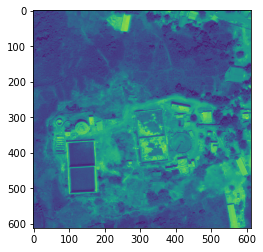

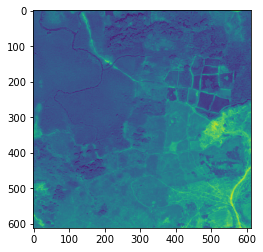

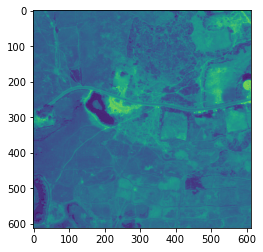

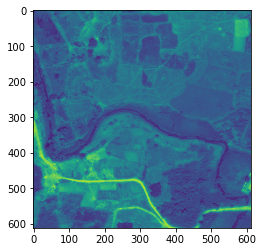

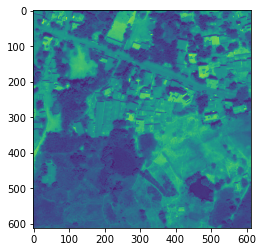

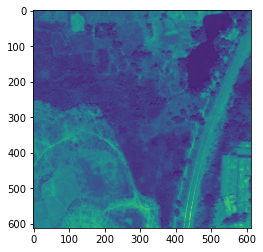

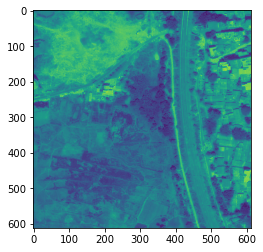

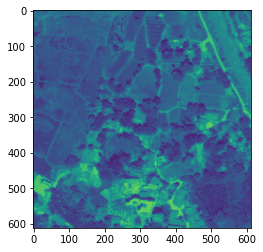

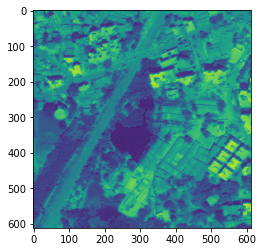

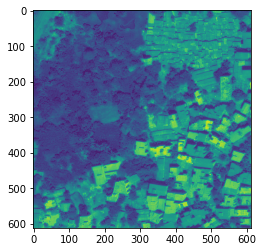

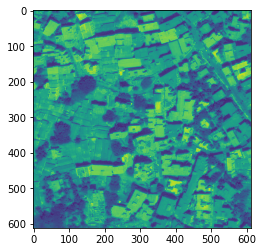

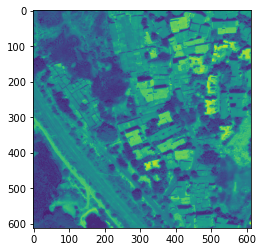

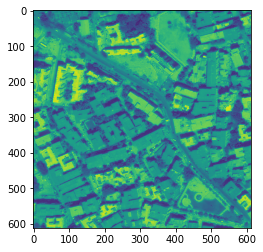

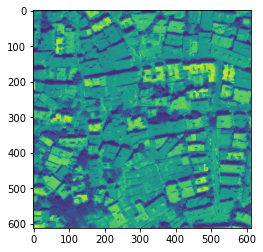

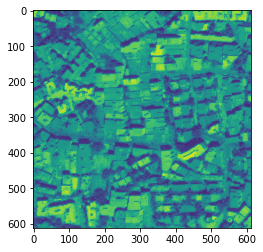

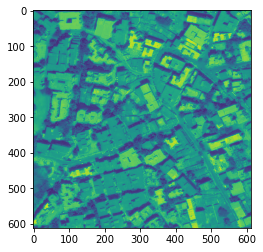

In [74]:
tiles.shape
for i in range(tiles.shape[0]):
    image = tiles[i,:,:,0]
    plt.imshow(image)
    plt.show()
    tf.keras.preprocessing.image.save_img('../Cropping_Test/im_1.jpg', tiles[0,:,:,:], data_format=None, file_format=None, scale=True)

In [96]:
def split_images(data_generator, mask_generator, split, batch_size, batch_n = None):
    tile_size = int(img_height/np.sqrt(split))
    print(f'Resulting image size: {tile_size} x {tile_size}')
    batch_index = 0
    if batch_n != None:
        while batch_index <= batch_n:
            x = data_generator.next()
            m = mask_generator.next()
            for i in range(batch_size):
                data_tiles = split_image(x[i,:,:,:], [tile_size, tile_size])
                mask_tiles = split_image(m[i,:,:,:], [tile_size, tile_size])
                for t in range(data_tiles.shape[0]):
                    tf.keras.preprocessing.image.save_img(f'../Cropping_Test/Train_Batch_{batch_index}_Image_{i}_Tile_{t}.png', 
                                                          data_tiles[t,:,:,:], data_format=None, file_format=None, scale=True)
                    tf.keras.preprocessing.image.save_img(f'../Cropping_Test/Mask_Batch_{batch_index}_Image_{i}_Tile_{t}.png', 
                                                          mask_tiles[t,:,:,:], data_format=None, file_format=None, scale=True)
            batch_index = batch_index + 1
    else:
        while batch_index <= data_generator.batch_index:
            x = data_generator.next()
            m = mask_generator.next()
            for i in range(batch_size):
                data_tiles = split_image(x[i,:,:,:], [tile_size, tile_size])
                mask_tiles = split_image(m[i,:,:,:], [tile_size, tile_size])
                for t in range(data_tiles.shape[0]):
                    tf.keras.preprocessing.image.save_img(f'../Cropping_Test/Train_Batch_{batch_index}_Image_{i}_Tile_{t}.png', 
                                                          data_tiles[t,:,:,:], data_format=None, file_format=None, scale=True)
                    tf.keras.preprocessing.image.save_img(f'../Cropping_Test/Mask_Batch_{batch_index}_Image_{i}_Tile_{t}.png', 
                                                          mask_tiles[t,:,:,:], data_format=None, file_format=None, scale=True)
            batch_index = batch_index + 1

In [95]:
split_images(data_generator, mask_generator, 4, batch_size, batch_n = 2)

Resulting image size: 1224 x 1224
